In [1]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import argparse

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'pc_grc_pattern_similarity_210101'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

# ap = argparse.ArgumentParser()
# ap.add_argument("--min_length", type=int, default=20)
# ap.add_argument("--max_dist", type=int, default=100)
# config = ap.parse_args()
min_length = 30
max_dist = 150

from weight_database import WeightDatabase
weightdb = WeightDatabase()

# weightdb.load_syn_db('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/gen_210101_setup01_syndb_threshold_10_coalesced_filtered_10.gz')
# weightdb.load_touch_db(
#     '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/purkinje/db_pf_contacts_201224.gz',
#     max_dist=max_dist
#     )
weightdb.load_syn_db('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/grc_axons/gen_201224_setup01_syndb_threshold_10_coalesced_filtered_10.gz')
weightdb.load_touch_db(
    '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/purkinje/grc_pc_touches_201224.gz',
    max_dist=max_dist
    )

postsyns = weightdb.get_postsyn_ids()
data_grc = []

def calc_pattern_similarity(weightdb, type='Data'):
    mpd = MyPlotData()
    processed = set()
    n = 0
    for pc0 in postsyns:
        for pc1 in postsyns:
            if pc0 == pc1:
                continue
            if (pc0, pc1) in processed:
                continue
            processed.add((pc0, pc1))
            processed.add((pc1, pc0))
            if len(weightdb.get_shared_presyns(pc0, pc1)) < min_length:
                continue
            score = weightdb.calc_pattern_similarity(pc0, pc1)
            # if score >= 0.7:
            #     print(f'{pc0} and {pc1}: {score}')
            data_grc.append(score)
            mpd.add_data_point(
                score=score,
                type=type,
                )
            n += 1
    print(f'n={n} pairs')
    return mpd

mpd_data = calc_pattern_similarity(weightdb)

weightdb_random = weightdb.randomize_connectivity(type='postsyn')
mpd_random = calc_pattern_similarity(weightdb_random, type='Random')

# print(f'Num samples: {n}')

# import compress_pickle
# compress_pickle.dump(
#     (mpd),
#     f'{script_n}_max_dist_{max_dist}_min_length_{min_length}_db.gz',)

n=153 pairs
n=153 pairs


In [10]:
gzfile = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/pfs_pc_analysis/pc_pfs_pattern_similarity_210107_JLR_max_dist_150_min_length_30_n5_data.gz'

import compress_pickle
data_pfs, data_random = compress_pickle.load(gzfile)

import scipy
fout_name = f'{script_n}_max_dist_{max_dist}_min_length_{min_length}'
with open(f'{script_n}_results', 'w') as fout:
    for foutt in [fout, sys.stdout]:
        print('Comparing grc to pfs', file=foutt)
#         print(scipy.stats.ttest_ind(data_grc, data_pfs), file=foutt)
        print(scipy.stats.ranksums(data_grc, data_pfs), file=foutt)
#         print(scipy.stats.mannwhitneyu(data_grc, data_pfs, alternative='greater'), file=foutt)
#         print(scipy.stats.ks_2samp(data_grc, data_pfs), file=foutt)
        print('Comparing grc to random', file=foutt)
#         print(scipy.stats.ttest_ind(data_grc, data_random), file=foutt)
        print(scipy.stats.ranksums(data_grc, data_random), file=foutt)
#         print(scipy.stats.mannwhitneyu(data_grc, data_random, alternative='greater'), file=foutt)
#         print(scipy.stats.ks_2samp(data_grc, data_random), file=foutt)
        print('Comparing pfs to random', file=foutt)
#         print(scipy.stats.ttest_ind(data_pfs, data_random), file=foutt)
        print(scipy.stats.ranksums(data_pfs, data_random), file=foutt)
#         print(scipy.stats.mannwhitneyu(data_pfs, data_random, alternative='greater'), file=foutt)
#         print(scipy.stats.ks_2samp(data_pfs, data_random), file=foutt)

print(scipy.stats.kruskal(data_random, data_grc, data_pfs))
import scikit_posthocs
scikit_posthocs.posthoc_dunn([data_random, data_pfs, data_grc], p_adjust='bonferroni')

Comparing grc to pfs
RanksumsResult(statistic=12.092030444046019, pvalue=1.1637458947554905e-33)
Comparing grc to random
RanksumsResult(statistic=15.929059331172333, pvalue=3.983039669605771e-57)
Comparing pfs to random
RanksumsResult(statistic=3.2271227449788196, pvalue=0.001250418078207376)
KruskalResult(statistic=257.4407103655594, pvalue=1.2515840948611906e-56)


,1,2,3
1,1.000000e+00,4.338782e-03,4.228053e-57
2,4.338782e-03,1.000000e+00,9.132750e-32
3,4.228053e-57,9.132750e-32,1.000000e+00


Height: 4, Aspect: 0.75


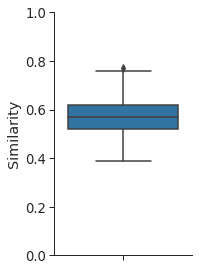

In [12]:
mpd_all = MyPlotData()
mpd_all.append(mpd_data)
mpd_all.append(mpd_random)

# importlib.reload(my_plot); my_plot.my_catplot(
#     mpd_all,
#     x="type",
#     y="score",
#     # hue="type",
#     # hue_order=['All', 'Per PC', 'Per pf'],
#     # hue_order=['All', 'Per PC'],
# #     ylim=[.30, .70],
#     context='paper',
#     kind='box',
#     # add_swarm=True,
#     # font_scale=1.5,
#     height=4,
#     width=4,
#     y_axis_label='Similarity',
#     # x_axis_label='# of synapses per connection',
#     save_filename=f'{script_n}_max_dist_{max_dist}_min_length_{min_length}.svg',
#     show=True,
#     )


importlib.reload(my_plot); my_plot.my_catplot(
    mpd_all,
#     x="type",
    y="score",
    ylim=[0, 1],
    context='paper',
    kind='box',
    height=4,
    width=3,
    y_axis_label='Similarity',
    # x_axis_label='# of synapses per connection',
    save_filename=f'{script_n}_max_dist_{max_dist}_min_length_{min_length}.svg',
    show=True,
    )


Height: 4, Aspect: 1.33


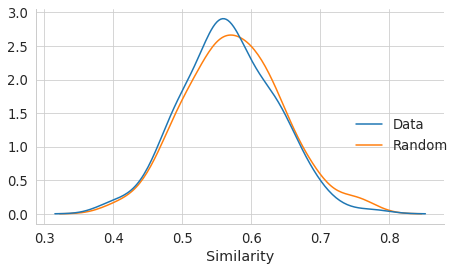

In [9]:
# 
importlib.reload(my_plot); my_plot.my_displot(
    mpd_all,
    # x="num_syns_per_connection",
    x="score",
    hue="type",
    # hue_order=['All', 'Per PC', 'Per pf'],
    # hue_order=['All', 'Per PC'],
#     ylim=[.30, .70],
#     xlim=[-.4, .4],
    context='paper',
    kind='kde',
    # add_swarm=True,
    # font_scale=1.5,
    height=4,
#     bw_adjust=.75,
#     binwidth=.02,
    # width=2.5,
    # y_axis_label='Similarity (%)',
    x_axis_label='Similarity',
    save_filename=f'{script_n}_max_dist_{max_dist}_min_length_{min_length}_kde.svg',
    show=True,
    )

In [11]:

for min_length in [10, 20, 30, 40, 50]:

    paired_similarity = defaultdict(lambda: defaultdict(float))

    def calc_pattern_similarity(weightdb, type='Data'):
        mpd = MyPlotData()
        processed = set()
        n = 0
        for pc0 in postsyns:
            for pc1 in postsyns:
                if (pc0, pc1) in processed:
                    continue
                paired_similarity[pc0][pc1] = None
                paired_similarity[pc1][pc0] = None
                if pc0 == pc1:
                    paired_similarity[pc0][pc1] = 1
                    continue
                processed.add((pc0, pc1))
                processed.add((pc1, pc0))
                if len(weightdb.get_shared_presyns(pc0, pc1)) < min_length:
                    continue

                score = weightdb.calc_pattern_similarity(pc0, pc1)
                paired_similarity[pc0][pc1] = score
                paired_similarity[pc1][pc0] = score
                mpd.add_data_point(
                    score=score,
                    type=type,
                    )
                n += 1

        print(f'n={n} pairs')
        return mpd

    mpd_data = calc_pattern_similarity(weightdb)

    import compress_pickle
    compress_pickle.dump(
        dict(paired_similarity),
        f'{script_n}_max_dist_{max_dist}_min_length_{min_length}_paired_score.gz',)

n=273 pairs
n=181 pairs
n=153 pairs
n=122 pairs
n=99 pairs


In [14]:
# same as above but adjust weight based on min_length

beta = 20  # denominator used to calculate weighted coefficients for samples with higher # of common grcs; higher -> more homogenous weights
gamma = 1.2  # how much to increase score by given weighted coefficients

for min_length in [30]:

    paired_similarity = defaultdict(lambda: defaultdict(float))

    def calc_pattern_similarity(weightdb, type='Data'):
        mpd = MyPlotData()
        processed = set()
        n = 0
        for pc0 in postsyns:
            for pc1 in postsyns:
                if (pc0, pc1) in processed:
                    continue
                paired_similarity[pc0][pc1] = None
                paired_similarity[pc1][pc0] = None
                if pc0 == pc1:
                    paired_similarity[pc0][pc1] = 1
                    continue
                processed.add((pc0, pc1))
                processed.add((pc1, pc0))
                shared_pattern_len = len(weightdb.get_shared_presyns(pc0, pc1))
                if shared_pattern_len < min_length:
                    continue

                score = weightdb.calc_pattern_similarity(pc0, pc1)
                # score will be between 0 and 1, we want to scale it from .5
                score -= .5
                factor = (shared_pattern_len - min_length)/beta # e.g., .1, .2, 3, ...
                score = score * math.pow(gamma, factor)
                score += .5
                if score < 0: score = 0
                if score > 1: score = 1
                paired_similarity[pc0][pc1] = score
                paired_similarity[pc1][pc0] = score
                mpd.add_data_point(
                    score=score,
                    type=type,
                    )
                n += 1

        print(f'n={n} pairs')
        return mpd

    mpd_data = calc_pattern_similarity(weightdb)

    import compress_pickle
    fname_out = f'{script_n}_max_dist_{max_dist}_min_length_{min_length}_paired_score_adj_beta_{beta}_gamma_{gamma}.gz'
    compress_pickle.dump(
        dict(paired_similarity),
        fname_out)
    print(fname_out)
    

n=153 pairs
pc_grc_pattern_similarity_210101_max_dist_150_min_length_30_paired_score_adj_beta_20_gamma_1.2.gz
